In [7]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from utils import ssmr_utils as ssmru
from visualization import papermode

papermode(plt, size=12)


In [8]:
abbrs = tuple(u.abbrange("M", 1, 8))
colors = u.COLORS
terrains = sorted(set(u.get_terrain(a) for a in abbrs))
terr_cols = {terr: colors[terr] for terr in terrains}
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

rot_abbrs = ("M03", "M04", "M05", "M06")
lin_abbrs = ("M01", "M02", "M07")

dashes = {
    "rotational": "-",
    "linear": ":",
}

def add_legends(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    patch = lambda d, c: plt.plot([], [], ls=d, color=c)[0]

    terr_legend_labels, terr_legend_handles = terr_cols.keys(), terr_cols.values()
    terr_legend_handles = [patch("-", col) for col in terr_legend_handles]
    run_legend_labels, run_legend_handles = dashes.keys(), dashes.values()
    run_legend_handles = [patch(dash, "k") for dash in run_legend_handles]

    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    terrain_legend = mpl_elem.legend(
        handles=terr_legend_handles,
        labels=terr_legend_labels,
        bbox_to_anchor=(0, 0.04),
        loc="upper left",
        title="Terrain",
    )
    mpl_elem.add_artist(terrain_legend)

    run_legend = mpl_elem.legend(
        handles=run_legend_handles,
        labels=run_legend_labels,
        bbox_to_anchor=(1, 0.04),
        loc="upper right",
        title="Type of run",
    )
    mpl_elem.add_artist(run_legend)

In [9]:
p2014_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2014df = pentzer2014pow.pentzer2014pow(abbr, verbose=False);
    p2014_dfs[abbr] = p2014df

M07: 100%|██████████| 195/195 [00:00<00:00, 915.20it/s]


In [10]:
model_name = pentzer2014pow.__MODEL_NAME__.lower()
figdir = u.get_figdir("thesis", subdir=f"modeling/preliminary-{model_name}")

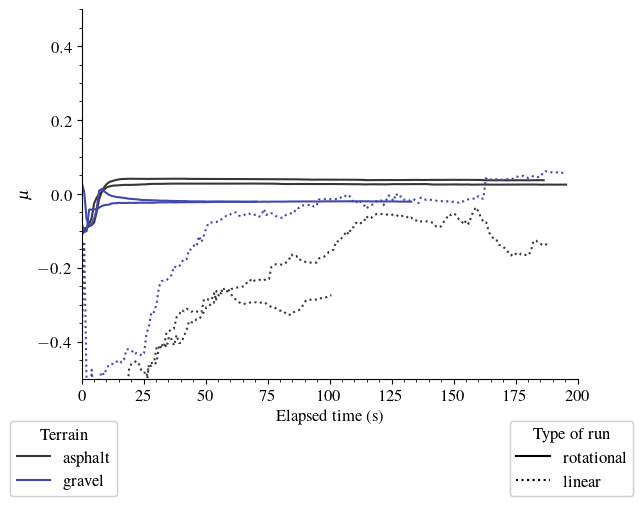

In [11]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rot_abbrs else dashes["linear"]
    ax.plot(
        p2014_dfs[abbr].time_rel,
        p2014_dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1
    )
add_legends(fig)
ax.set_xlabel("Elapsed time (s)")
ax.set_ylabel("$\mu$")
ax.set_ylim(bottom=-0.5, top=0.5)
ax.set_xlim(left=0, right=200)
ax.spines[["right", "top"]].set_visible(False)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

for ext in u.EXTS:
    fig.savefig(figdir / f"m-s.{ext}", bbox_inches="tight")


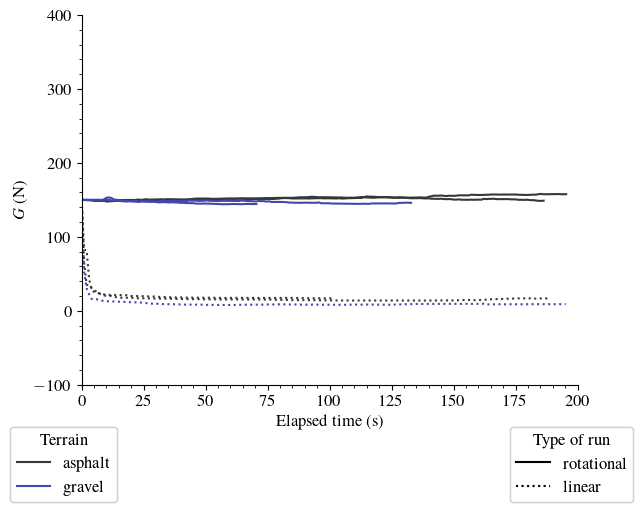

In [12]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rot_abbrs else dashes["linear"]
    ax.plot(
        p2014_dfs[abbr].time_rel,
        p2014_dfs[abbr].G_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1
    )
add_legends(fig)
ax.set_xlabel("Elapsed time (s)")
ax.set_ylabel("$G$ (N)")
ax.set_ylim(bottom=-100, top=400)
ax.set_xlim(left=0, right=200)
ax.spines[["right", "top"]].set_visible(False)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

for ext in u.EXTS:
    fig.savefig(figdir / f"G-s.{ext}", bbox_inches="tight")